# Julia and structural geology 
Started 2019-07-05

This is a notebook for investigating Julia tools applicable for structural geology and field mapping processings.

Available sites are:
- Julia Observer: https://juliaobserver.com/packages
- JuliaGeo: https://github.com/JuliaGeo

## Used packages

In [3]:
using Pkg

GDAL

In [4]:
Pkg.add("GDAL")
Pkg.test("GDAL")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`


┌ Warning: Some registries failed to update:
│     — /home/mauro/.julia/registries/General — failed to fetch from repo
└ @ Pkg.API /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Pkg/src/API.jl:157


 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
   Testing GDAL
    Status `/tmp/tmpnwhlfS/Manifest.toml`
  [b99e7846] BinaryProvider v0.5.4
  [add2ef01] GDAL v0.2.0
  [2a0f44e3] Base64  [`@stdlib/Base64`]
  [8ba89e20] Distributed  [`@stdlib/Distributed`]
  [b77e0a4c] InteractiveUtils  [`@stdlib/InteractiveUtils`]
  [8f399da3] Libdl  [`@stdlib/Libdl`]
  [37e2e46d] LinearAlgebra  [`@stdlib/LinearAlgebra`]
  [56ddb016] Logging  [`@stdlib/Logging`]
  [d6f4376e] Markdown  [`@stdlib/Markdown`]
  [9a3f8284] Random  [`@stdlib/Random`]
  [ea8e919c] SHA  [`@stdlib/SHA`]
  [9e88b42a] Serialization  [`@stdlib/Serialization`]
  [6462fe0b] Sockets  [`@stdlib/Sockets`]
  [8dfed614] Test  [`@stdlib/Test`]


┌ Info: GDAL 2.2.4, released 2018/03/19
│ 159 GDAL drivers found
└ 46 OGR drivers found


   Testing GDAL tests passed 


CPLDestroyMutex: Error = 16 (Device or resource busy)


PyPlot

In [5]:
Pkg.add("PyPlot")

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


RCall

In [6]:
Pkg.add("RCall")

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


To use a library, we need the command "*using*".

## GDAL

We first consider the GDAL package, that make avialable one of the most used GIS library, written in C. Julia GDAL is available at https://github.com/JuliaGeo/GDAL.jl


GDAL allows to process georeferenced raster and vectorial datasets.

In [7]:
using GDAL

For the tests we use an Aster DEM of the Mt. Alpi (Southern Apennines, Italy).

In [8]:
src_geotif = joinpath(@__DIR__, "example_data/mt_alpi/mtAlpi_aster.tif")

"/home/mauro/Documents/projects/jeo/example_data/mt_alpi/mtAlpi_aster.tif"

Since the package internal GDAL path does not result correctly defined, the path to the gdalinfo executable is explicitely defined.

In [9]:
gdalinfo_path = "/usr/bin/gdalinfo"

"/usr/bin/gdalinfo"

In [10]:
run(`$(gdalinfo_path) $(src_geotif)`)

Driver: GTiff/GeoTIFF
Files: /home/mauro/Documents/projects/jeo/example_data/mt_alpi/mtAlpi_aster.tif
       /home/mauro/Documents/projects/jeo/example_data/mt_alpi/mtAlpi_aster.tif.aux.xml
Size is 213, 260
Coordinate System is:
PROJCS["WGS 84 / UTM zone 33N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",15],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32633"]]
Orig

Process(`/usr/bin/gdalinfo /home/mauro/Documents/projects/jeo/example_data/mt_alpi/mtAlpi_aster.tif`, ProcessExited(0))

The following lines are modified from https://github.com/JuliaGeo/GDAL.jl/blob/master/test/tutorial_raster.jl

In [11]:
GDAL.allregister()

In [12]:
dataset = GDAL.open(src_geotif, GDAL.GA_ReadOnly)

Ptr{GDAL.GDALDatasetH} @0x00000000044a0b00

In [13]:
band = GDAL.getrasterband(dataset, 1)

Ptr{GDAL.GDALRasterBandH} @0x00000000035666b0

In [14]:
xsize = GDAL.getrasterbandxsize(band)

213

In [15]:
ysize = GDAL.getrasterbandysize(band)

260

In [16]:
data = zeros(Float32, xsize, ysize)

213×260 Array{Float32,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [17]:
GDAL.rasterio(band, GDAL.GF_Read, 0, 0, xsize, ysize,
data, xsize, ysize, GDAL.GDT_Float32, 0, 0)

CE_None::CPLErr = 0

In [18]:
data

213×260 Array{Float32,2}:
    0.0     0.0  1097.0  1083.0  1083.0  …    0.0    0.0    0.0    0.0    0.0
    0.0     0.0  1096.0  1084.0  1084.0       0.0    0.0    0.0    0.0    0.0
    0.0     0.0  1097.0  1088.0  1088.0       0.0    0.0    0.0    0.0    0.0
    0.0     0.0  1101.0  1095.0  1095.0     825.0  819.0  810.0  802.0  795.0
    0.0     0.0  1100.0  1095.0  1095.0     830.0  824.0  815.0  808.0  802.0
    0.0     0.0  1101.0  1095.0  1095.0  …  826.0  826.0  817.0  810.0  806.0
    0.0     0.0  1101.0  1094.0  1094.0     827.0  827.0  819.0  813.0  806.0
    0.0     0.0  1102.0  1094.0  1091.0     828.0  828.0  822.0  814.0  807.0
    0.0     0.0  1104.0  1100.0  1096.0     830.0  830.0  824.0  815.0  809.0
    0.0     0.0  1112.0  1108.0  1100.0     835.0  835.0  828.0  816.0  812.0
    0.0     0.0  1128.0  1118.0  1108.0  …  840.0  840.0  830.0  820.0  816.0
    0.0     0.0  1132.0  1121.0  1112.0     850.0  850.0  840.0  832.0  824.0
    0.0     0.0  1132.0  1122.0  1113.

The data seem to have been read. We try to visualize them.

In [19]:
using PyPlot

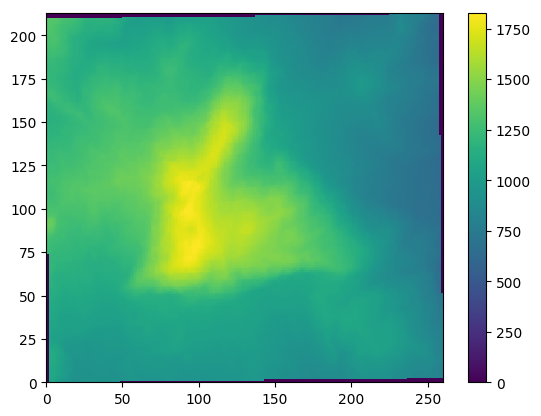

PyObject <matplotlib.colorbar.Colorbar object at 0x7f67b5d38c18>

In [20]:
pcolormesh(data)
colorbar()

Unfortunately the map does not have a correct orientation: we have to rotate it 90° clockwise in order to have the North direction upward pointing.

In [21]:
rotated = rotl90(data)

260×213 Array{Float32,2}:
    0.0     0.0     0.0   795.0  …     0.0     0.0    0.0    0.0    0.0
    0.0     0.0     0.0   802.0        0.0     0.0    0.0    0.0    0.0
    0.0     0.0     0.0   810.0      638.0   639.0  638.0  641.0  647.0
    0.0     0.0     0.0   819.0      645.0   647.0  649.0  655.0  661.0
    0.0     0.0     0.0   825.0      653.0   655.0  649.0  655.0  661.0
    0.0     0.0     0.0   825.0  …   654.0   655.0  659.0  666.0  673.0
    0.0     0.0     0.0   826.0      664.0   669.0  674.0  679.0  684.0
    0.0     0.0     0.0   830.0      678.0   680.0  683.0  687.0  695.0
    0.0     0.0     0.0   834.0      687.0   693.0  697.0  706.0  715.0
    0.0     0.0     0.0   834.0      697.0   704.0  711.0  723.0  733.0
    0.0     0.0     0.0   835.0  …   714.0   717.0  727.0  740.0  745.0
    0.0     0.0     0.0   840.0      733.0   743.0  747.0  753.0  763.0
    0.0     0.0     0.0   846.0      750.0   760.0  767.0  775.0  780.0
    ⋮                            ⋱    

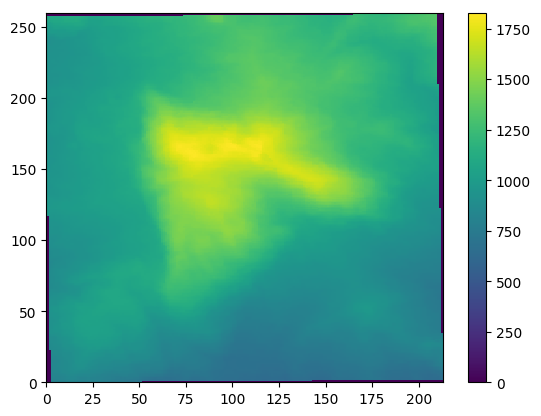

PyObject <matplotlib.colorbar.Colorbar object at 0x7f67b5cdc0f0>

In [22]:
pcolormesh(rotated)
colorbar()

We use RCall for statistical analysis: http://luiarthur.github.io/usingrcall.


This package makes R available. It is the most advanced OS statistical library and allows to easily create statistical plots.

In [23]:
using RCall

In [24]:
@rput rotated

260×213 Array{Float32,2}:
    0.0     0.0     0.0   795.0  …     0.0     0.0    0.0    0.0    0.0
    0.0     0.0     0.0   802.0        0.0     0.0    0.0    0.0    0.0
    0.0     0.0     0.0   810.0      638.0   639.0  638.0  641.0  647.0
    0.0     0.0     0.0   819.0      645.0   647.0  649.0  655.0  661.0
    0.0     0.0     0.0   825.0      653.0   655.0  649.0  655.0  661.0
    0.0     0.0     0.0   825.0  …   654.0   655.0  659.0  666.0  673.0
    0.0     0.0     0.0   826.0      664.0   669.0  674.0  679.0  684.0
    0.0     0.0     0.0   830.0      678.0   680.0  683.0  687.0  695.0
    0.0     0.0     0.0   834.0      687.0   693.0  697.0  706.0  715.0
    0.0     0.0     0.0   834.0      697.0   704.0  711.0  723.0  733.0
    0.0     0.0     0.0   835.0  …   714.0   717.0  727.0  740.0  745.0
    0.0     0.0     0.0   840.0      733.0   743.0  747.0  753.0  763.0
    0.0     0.0     0.0   846.0      750.0   760.0  767.0  775.0  780.0
    ⋮                            ⋱    

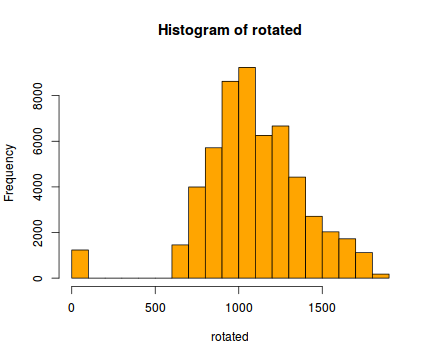

RObject{VecSxp}
$breaks
 [1]    0  100  200  300  400  500  600  700  800  900 1000 1100 1200 1300 1400
[16] 1500 1600 1700 1800 1900

$counts
 [1] 1233    0    0    0    0    0 1457 3995 5716 8627 9235 6254 6669 4429 2711
[16] 2030 1724 1123  177

$density
 [1] 0.0002226436 0.0000000000 0.0000000000 0.0000000000 0.0000000000
 [6] 0.0000000000 0.0002630914 0.0007213796 0.0010321416 0.0015577826
[11] 0.0016675695 0.0011292886 0.0012042254 0.0007997472 0.0004895269
[16] 0.0003665583 0.0003113037 0.0002027808 0.0000319610

$mids
 [1]   50  150  250  350  450  550  650  750  850  950 1050 1150 1250 1350 1450
[16] 1550 1650 1750 1850

$xname
[1] "rotated"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


In [25]:
R"hist(rotated, col='orange')"

Since the zero values are the artefacts of the array initialization, we change them to NaN.

In [26]:
corrected = replace!(rotated, 0.0=>NaN)

260×213 Array{Float32,2}:
  NaN     NaN     NaN     795.0  …   NaN     NaN    NaN    NaN    NaN  
  NaN     NaN     NaN     802.0      NaN     NaN    NaN    NaN    NaN  
  NaN     NaN     NaN     810.0      638.0   639.0  638.0  641.0  647.0
  NaN     NaN     NaN     819.0      645.0   647.0  649.0  655.0  661.0
  NaN     NaN     NaN     825.0      653.0   655.0  649.0  655.0  661.0
  NaN     NaN     NaN     825.0  …   654.0   655.0  659.0  666.0  673.0
  NaN     NaN     NaN     826.0      664.0   669.0  674.0  679.0  684.0
  NaN     NaN     NaN     830.0      678.0   680.0  683.0  687.0  695.0
  NaN     NaN     NaN     834.0      687.0   693.0  697.0  706.0  715.0
  NaN     NaN     NaN     834.0      697.0   704.0  711.0  723.0  733.0
  NaN     NaN     NaN     835.0  …   714.0   717.0  727.0  740.0  745.0
  NaN     NaN     NaN     840.0      733.0   743.0  747.0  753.0  763.0
  NaN     NaN     NaN     846.0      750.0   760.0  767.0  775.0  780.0
    ⋮                            ⋱    

And recalculate the histogram in R

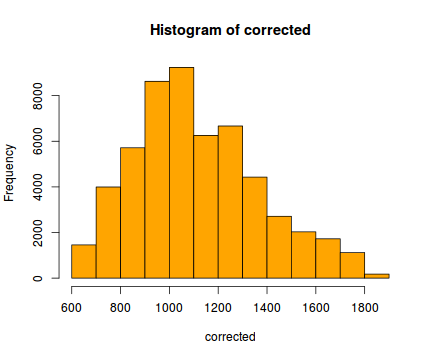

RObject{VecSxp}
$breaks
 [1]  600  700  800  900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900

$counts
 [1] 1457 3995 5716 8627 9235 6254 6669 4429 2711 2030 1724 1123  177

$density
 [1] 2.690823e-04 7.378063e-04 1.055645e-03 1.593255e-03 1.705542e-03
 [6] 1.155004e-03 1.231647e-03 8.179585e-04 5.006741e-04 3.749054e-04
[11] 3.183925e-04 2.073984e-04 3.268879e-05

$mids
 [1]  650  750  850  950 1050 1150 1250 1350 1450 1550 1650 1750 1850

$xname
[1] "corrected"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


In [27]:
@rput corrected
R"hist(corrected, col='orange')"

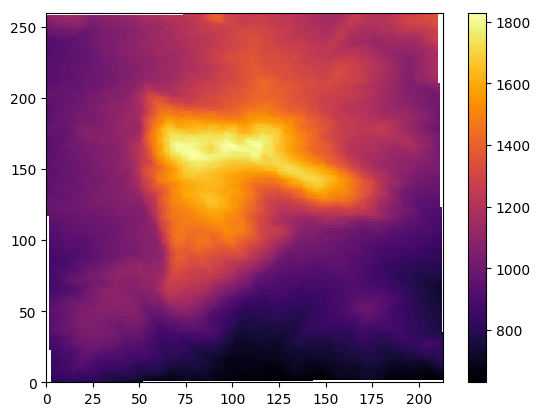

PyObject <matplotlib.colorbar.Colorbar object at 0x7f67b5cc7320>

In [28]:
pcolormesh(corrected, cmap="inferno")
colorbar()

In [29]:
hillshade = joinpath(@__DIR__, "example_data/mt_alpi/mtAlpi_hillshade.asc")

"/home/mauro/Documents/projects/jeo/example_data/mt_alpi/mtAlpi_hillshade.asc"

In [30]:
# calculate hillshade
# adapted from: https://github.com/JuliaGeo/GDAL.jl/blob/master/test/gdal_utils.jl
options = GDAL.demprocessingoptionsnew(["-of","AAIGrid"], C_NULL)
ds_dempr = GDAL.demprocessing(hillshade, dataset, "hillshade", C_NULL, options, C_NULL)
GDAL.demprocessingoptionsfree(options)
GDAL.close(ds_dempr)